# Profesional I
## Analítica
### Departamento de Analítica y Gestión de Información
#### Prueba Específica - Junio 2021

### Desarrollada por: Juansebastian Gómez Muñoz
25 de junio de 2021

Uno de los principales inconvenientes en la masificación de los productos de crédito móviles es el conocimiento del ingreso real del cliente. Para este tipo de canales es de alta importancia la información que se puede capturar en el momento de la solicitud, en
donde se puede pedir al cliente diligenciar una serie de variables demográficas (edad, género, estrato, empleador, etc.) y su ingreso mensual. 

Se ha identificado que existe una población de clientes que declara niveles de ingresos mucho mayores a los que realmente devengan, para los cuales es necesario construir una política que permita ajustar su endeudamiento.

Su objetivo es utilizar la base de datos proporcionada para determinar cuáles son los factores que influyen en que un cliente declare un ingreso superior al realmente devengado, y plantear recomendaciones accionables basadas en sus hallazgos.

Adicional al diagnóstico arriba mencionado, usted deberá construir un modelo de clasificación que permita identificar a los clientes que con mayor probabilidad estarían declarando un ingreso superior al real (utilice 20% como umbral para definir que el ingreso fue mayor).

Para solucionar el problema se plantea el siguiente esquema:
    
**1.** Realice labores de limpieza, exploración, y visualización de la información, que le permitan llegar a conclusiones preliminares y responder preguntas de tipo descriptivo (regiones con mayor desviación, estratos con mayor desviación, edades con mayor desviación, etc.)

**2.** Construya un modelo analítico que permita determinar si un cliente declara ingresos superiores a los reales. Explique de qué manera escogió el modelo y qué métricas utilizó para validar su desempeño.

**3.** Explique a manera de conclusión como se puede utilizar el resultado del modelo planteado, y cómo se podrían crear polìticas que mitiguen el riesgo de estos clientes.

*Recuerde que las conclusiones y/o recomendaciones deben ser accionables, es decir, deben generar un posible plan de acción que permita mejorar el resultado encontrado.*

# Solución

## 1. Limpieza, exploración, y visualización de la información

El primer paso es importar las librerias de Python útiles para el análisis de los datos y el desarrollo de los modelos analiticos.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Se utiliza el método de Pandas `read_excel()` para cargar los datos desde el archivo suministrado a un DataFrame y visualizar la información que contiene.

In [2]:
cc_analytics = pd.read_excel("AnexoProfesionalIAnalítica.xlsx")
cc_analytics.head()

,id,tipo_p,CANAL,EDAD,TIPO_CLIENTE_CUENTAS,INGRESO_DECLARADO,INGRESO_REAL,ACIERTA,NIVEL_RIESGO,TIPO_VENTA,SUCURSAL,REGIONAL
0,1,Independiente,WEB,41-50,Antiguo,400000.0,1250.000,675,MEDIO,Asistido,BOYACA,CENTRO SUR
1,2,Independiente,APP,31-35,Antiguo,150000.0,781.242,717,MEDIO,Asistido,BOGOTA,BOGOTA Y CUNDINAMARCA
2,3,Independiente,APP,36-40,Nuevo Act Dav,140000.0,785.979,753,MEDIO,Asistido,BOGOTA,BOGOTA Y CUNDINAMARCA
3,4,Independiente,WEB,41-50,Antiguo,150000.0,1135.000,849,BAJO,Asistido,BOGOTA,BOGOTA Y CUNDINAMARCA
4,5,Independiente,APP,36-40,Antiguo,90000.0,781.242,653,MEDIO,Asistido,VALLE,VALLE


Es útil conocer los tipos de variables de los datos para decidir sobre el método de visualización a usar.

In [3]:
cc_analytics_info = cc_analytics.info()
print(cc_analytics_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5333 non-null   int64  
 1   tipo_p                5333 non-null   object 
 2   CANAL                 5333 non-null   object 
 3   EDAD                  5333 non-null   object 
 4   TIPO_CLIENTE_CUENTAS  5333 non-null   object 
 5   INGRESO_DECLARADO     5333 non-null   float64
 6   INGRESO_REAL          5333 non-null   float64
 7   ACIERTA               5333 non-null   int64  
 8   NIVEL_RIESGO          5333 non-null   object 
 9   TIPO_VENTA            5333 non-null   object 
 10  SUCURSAL              5333 non-null   object 
 11  REGIONAL              5333 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 500.1+ KB
None


A continuación se identifican los valores faltantes y usando un loop, se puede calcular el número de valores faltantes en cada columna. 
"True" representa un valor perdido, "False" significa que el valor está presente en el conjunto de datos. En el *bucle*, el método `.value_counts ()` cuenta el número de valores "True".

In [4]:
missing_data = cc_analytics.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

id
False    5333
Name: id, dtype: int64

tipo_p
False    5333
Name: tipo_p, dtype: int64

CANAL
False    5333
Name: CANAL, dtype: int64

EDAD
False    5333
Name: EDAD, dtype: int64

TIPO_CLIENTE_CUENTAS
False    5333
Name: TIPO_CLIENTE_CUENTAS, dtype: int64

INGRESO_DECLARADO
False    5333
Name: INGRESO_DECLARADO, dtype: int64

INGRESO_REAL
False    5333
Name: INGRESO_REAL, dtype: int64

ACIERTA
False    5333
Name: ACIERTA, dtype: int64

NIVEL_RIESGO
False    5333
Name: NIVEL_RIESGO, dtype: int64

TIPO_VENTA
False    5333
Name: TIPO_VENTA, dtype: int64

SUCURSAL
False    5333
Name: SUCURSAL, dtype: int64

REGIONAL
False    5333
Name: REGIONAL, dtype: int64



In [5]:
cc_analytics.isnull().sum()

id                      0
tipo_p                  0
CANAL                   0
EDAD                    0
TIPO_CLIENTE_CUENTAS    0
INGRESO_DECLARADO       0
INGRESO_REAL            0
ACIERTA                 0
NIVEL_RIESGO            0
TIPO_VENTA              0
SUCURSAL                0
REGIONAL                0
dtype: int64

Con base en la información anterior se sabe que cada columna tiene 5333 filas de datos y que en ninguna columna se presentan datos faltantes.
 
Utilizando el método `.describe()` se obtiene información estadística de los datos, tanto de las variables categoricas como de las númericas.

**Variables categóricas**

In [6]:
cc_analytics_description_categ = cc_analytics.describe(include=['object'])
print(cc_analytics_description_categ)

          tipo_p CANAL    EDAD TIPO_CLIENTE_CUENTAS NIVEL_RIESGO TIPO_VENTA  \
count       5333  5333    5333                 5333         5333       5333   
unique         3     2       7                    3            3          2   
top     Empleado   APP   41-50              Antiguo        MEDIO   Asistido   
freq        3715  4253    1461                 2732         3118       3198   

       SUCURSAL               REGIONAL  
count      5333                   5333  
unique       21                      7  
top      BOGOTA  BOGOTA Y CUNDINAMARCA  
freq       2289                   2289  


**Variables númericas**

In [7]:
cc_analytics_description_values = cc_analytics.describe()
print(cc_analytics_description_values)

                id  INGRESO_DECLARADO  INGRESO_REAL      ACIERTA
count  5333.000000        5333.000000   5333.000000  5333.000000
mean   2667.000000        8667.895975   4302.222439   753.593475
std    1539.648824       13502.841959   4928.627632    84.908766
min       1.000000           0.004000    737.717000   457.000000
25%    1334.000000        3343.042000    902.780000   687.000000
50%    2667.000000        5400.000000   2210.000000   746.000000
75%    4000.000000        9900.000000   5690.042000   812.000000
max    5333.000000      400000.000000  54481.000000   999.000000


Los datos suministrados tiene de variables, tanto categoricas como númericas, que contiene valores en diferentes rangos.

La información de los clientes es anonima, se identifican con el índice *id*. Las columnas dan la información respecto al perfil del solicitante y al proceso de solicitud, así:

**PERFIL DEL SOLICITANTE**
 * *tipo_p*: ocupación dentro de tres (3) categorías.
 * *EDAD*: edad dentro de uno de siete (7) rangos establecidos.
 * *TIPO_CLIENTE_CUENTAS*: historial de cliente con el Banco dentro de tres (3) categorías.
 * *INGRESO_DECLARADO*: ingreso económico declarado en la solicitud.
 * *INGRESO_REAL*: ingreso económico soportado en la solicitud.
 * *ACIERTA*: modelo de score de crédito consistente en un esquema estadístico que se basa en el comportamiento y hábito de pago histórico con el objeto de permitir dar a conocer la probabilidad de cumplir con una obligación de sus clientes actuales y/o potenciales. Variable continua dentro del rango de 450 a 1000.
 * *NIVEL_RIESGO*: calificación de riesgo dentro de tres (3) categorías.
 
**PROCESO DE SOLICITUD**
 * *CANAL*: canal por el que se hace la solicitud dentro de dos (2) categorías.
 * *TIPO_VENTA*: recepción de asistencia durante la solicitud.
 * *SUCURSAL*: oficina que atiende la solicitud, con 21 oficinas diferentes identificadas.
 * *REGIONAL*: regional a la que pertenece la sucursal con 7 regionales identificadas.

**Información necesaria**: es necesario conocer la diferencia entre el ingreso declarado y el ingreso real para clasificar a los clientes antes de implementar el modelo. Se propone clasificar a los clientes según la diferencia porcentual entre el valor real y el valor reportado de ingresos. Siguiendo las recomendaciones se usara la siguiente clasificación:
 * 1 (True): si el ingreso reportado es >=20%  respecto al ingreso real
 * 0 (False): para los otros casos (<20%)

In [8]:
dif_Perc = 100*np.absolute(((cc_analytics["INGRESO_REAL"]-cc_analytics["INGRESO_DECLARADO"]))/(cc_analytics["INGRESO_REAL"]))

cc_analytics["dif_Perc"] = dif_Perc

cc_analytics["REPORTA_MAYOR_INGRESO"] = "" 

for i in cc_analytics.index:
    if(cc_analytics["INGRESO_REAL"][i]<cc_analytics["INGRESO_DECLARADO"][i]):
        if(cc_analytics["dif_Perc"][i] >= 20.0):
            cc_analytics.loc[i,"REPORTA_MAYOR_INGRESO"] = "y"
        else:
            cc_analytics.loc[i,"REPORTA_MAYOR_INGRESO"] = "n"
    else:
        cc_analytics.loc[i,"REPORTA_MAYOR_INGRESO"] = "n"

In [9]:
cc_analytics_description_report = cc_analytics['REPORTA_MAYOR_INGRESO'].describe()
print(cc_analytics_description_report)

count     5333
unique       2
top          y
freq      3430
Name: REPORTA_MAYOR_INGRESO, dtype: object


Asignada esta clasificación, se encuentra que aproximadamente el 64% de los solicitantes declaran mayores ingresos a los que realmente devengan.

Antes de iniciar la implementación del modelo, es útil visualizar la distribución de algunas de las variables.

En la siguiente gráfica se observa la distribución de edades dentro de los rangos reportados para cada tipo de ocupación.

 * Tanto los independietes como los empleados se distribuyen de manera normal en el rango de edad, siendo el rango de 41-50 el  que presenta mayor cantidad de personas.
 * La mayoría de solicitudes son hechas por empleados, seguidos por los independientes y luego los pensionados.
 * Los pensionados son, en general, mayores de 50 años.
 * Para facilitar la visualización de las otras varibles se utilizara el tipo de ocupación como identificador de la población y no la edad.

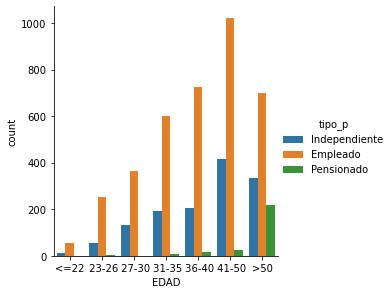

In [10]:
category_order = ['<=22',' 23-26',' 27-30',' 31-35',' 36-40'," 41-50",'>50']
sns.catplot(x="EDAD", hue="tipo_p",

                data=cc_analytics, kind="count", 
                
                order=category_order,

                height=4);

Las siguientes figuras muestran la relación entre el ingreso real y el ingreso declarado por los solicitantes. Las figuras son gráficos log-log para facilitar la visualización.
 * Para los tres tipos de ocupación se presenta una tendencia a declarar mayores ingresos a los realmente devengados.

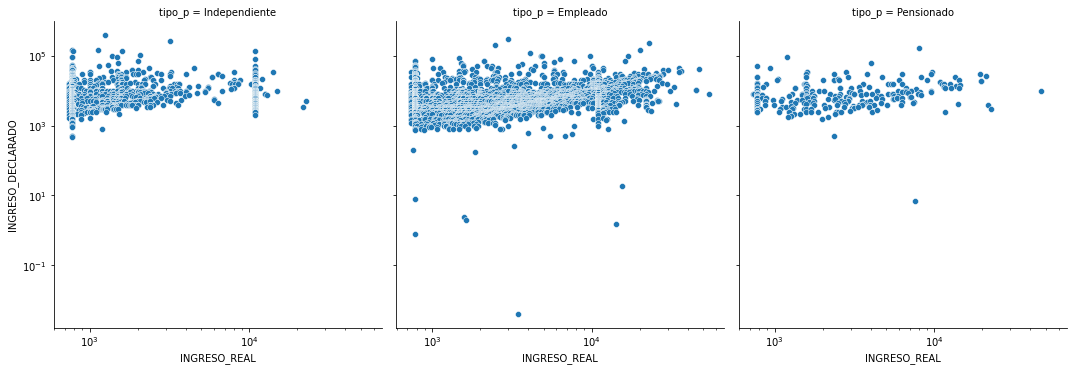

In [11]:
ax0 = sns.relplot(x="INGRESO_REAL", y="INGRESO_DECLARADO",col="tipo_p", data=cc_analytics);
ax0.set(xscale="log",yscale="log")

Para hacer un mejor analisis se pueden comparar las distribuciones de los ingresos declarados y reales para cada tipo de ocupación. Las figuras se presentan en escala logaritmica para el eje x. Se puede decir que:

 * El rango de los ingresos declarados y reales es consistente, sin embargo se observa que los ingresos reportados se distribuyen hasta un orden de mangitud mayor (10^4) comparado con los ingresos reales (10^3).
 * Se reportan ingresos reales muy bajos en un número significativo de solicitudes.

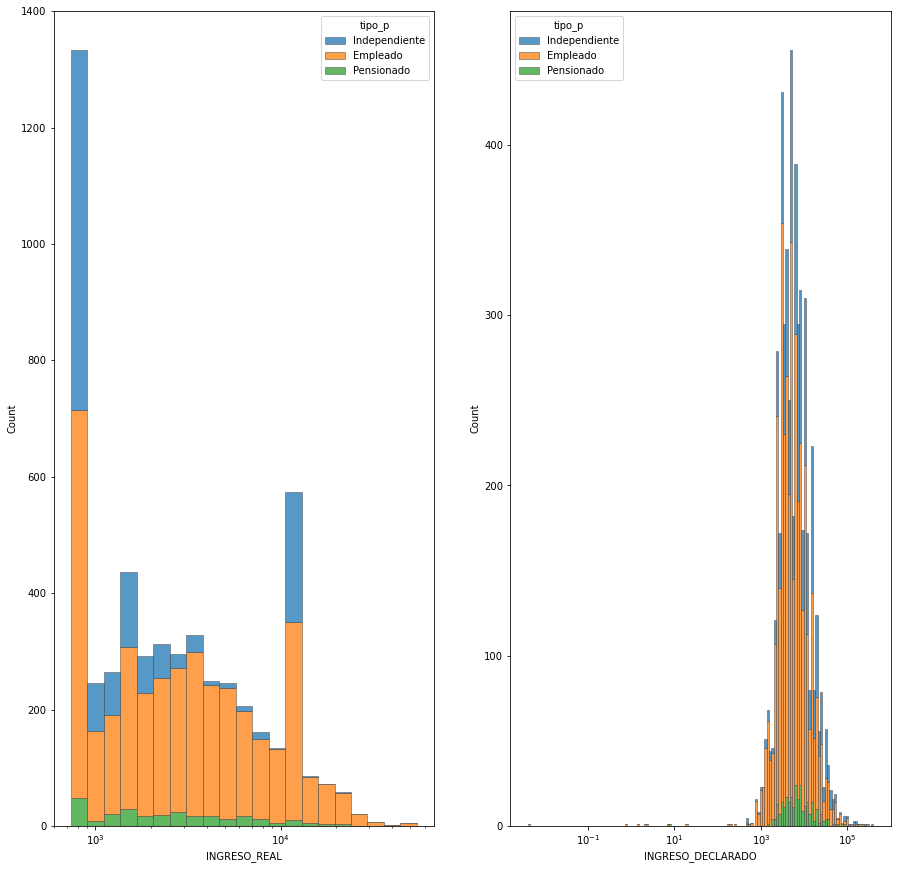

In [12]:
#cc_analytics['EDAD'].plot(kind='hist')
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

sns.histplot(cc_analytics,
             x="INGRESO_REAL", hue="tipo_p",
             multiple="stack", edgecolor=".3",
             linewidth=.5, log_scale=True, ax=axs[0]
            )
sns.histplot(cc_analytics,
    x="INGRESO_DECLARADO", hue="tipo_p",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True, ax=axs[1]
)
#ax.set(xlabel='log (Ingreso Real)', ylabel='Frecuencia')
plt.show()

Se puede revisar la distribución de los valores declarados y reales utilizando otro tipo de visualización.

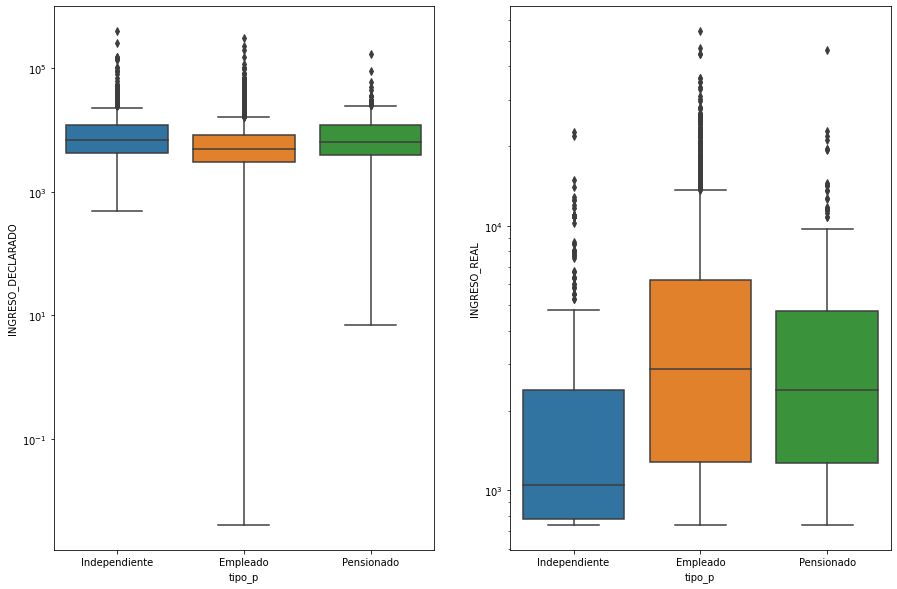

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
ax3 = sns.boxplot(x="tipo_p", y="INGRESO_DECLARADO", data=cc_analytics, ax=axs[0])
ax3.set(yscale="log")

ax4 = sns.boxplot(x="tipo_p", y="INGRESO_REAL", data=cc_analytics,ax=axs[1])
ax4.set(yscale="log")

plt.show()

Otra variable de interés es la calificación *ACIERTA* y su categoría asociada *NIVEL DE RIESGO*

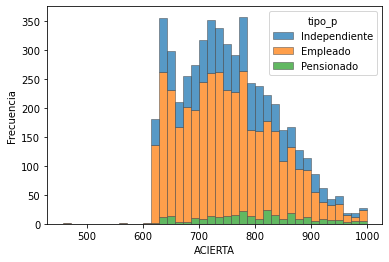

In [14]:
ax6 = sns.histplot(cc_analytics,
    x="ACIERTA", hue="tipo_p",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    )
ax6.set(xlabel='ACIERTA', ylabel='Frecuencia')
plt.show()

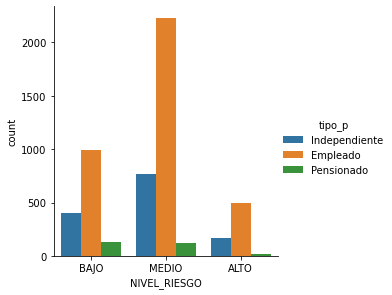

In [15]:
category_order_RIESGO = ['BAJO','MEDIO','ALTO']
sns.catplot(x="NIVEL_RIESGO", hue="tipo_p",

                data=cc_analytics, kind="count", 
                
                order=category_order_RIESGO,

                height=4);

 * Se observa que para los tres tipos de ocupación el nivel de riesgo más común es MEDIO.

## 2. Modelo analítico

Para implmentar el modelo se van a realizar primero tres tareas:
 * Convertir los datos no numéricos en numéricos.
 * Dividir los datos en conjuntos de prueba y entrenamiento.
 * Escalar los valores a un rango uniforme.

La conversión de los valores no numéricos en valores numéricos se hace porque no solo da como resultado un cálculo más rápido, sino que también muchos modelos de aprendizaje automático (como los desarrollados con scikit-learn) requieren que los datos estén en un formato estrictamente numérico. Esto se hace usando una técnica llamada *label encoding*.

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cc_analytics.columns.to_numpy():
    if cc_analytics[col].dtypes == 'object':
        cc_analytics[col]=le.fit_transform(cc_analytics[col])

Ahora, se dividen los datos en un conjunto de entrenamiento y un conjunto de pruebas para preparar los datos para dos fases diferentes del modelo de aprendizaje automático: entrenamiento y pruebas. Siguiendo la recomendación de no usar ninguna información de los datos de prueba para escalar los datos de entrenamiento, primero se dividen los datos y luego se hace el escalamiento.

Son de interés los datos disponibles respecto al prefil del solicitante, por lo tanto no se tendrán en cuenta las otras funciones (que denomine proceso de solicitud) del conjunto de datos para hacer las predicciones.

***Nota***: en este punto se genera la base de datos adjunta al desarrollo de la prueba.

In [17]:
from sklearn.model_selection import train_test_split
cc_analytics = cc_analytics.drop(["id","CANAL","SUCURSAL","REGIONAL","dif_Perc"], axis=1)
cc_analytics.to_excel("JuansebastianGomezM.xlsx")
cc_analytics_model = cc_analytics.to_numpy()

X,y = cc_analytics_model[:,0:8], cc_analytics_model[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

Solo queda un paso final de preprocesamiento de escalado antes de poder ajustar un modelo de aprendizaje automático a los datos.

Se reescalan todos los valores númericos al rango de 0-1.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

print ('Train set:', rescaledX_train.shape,  y_train.shape)
print ('Test set:', rescaledX_test.shape,  y_test.shape)

Train set: (3573, 8) (3573,)
Test set: (1760, 8) (1760,)


Esencialmente, predecir si un cliente reporta ingresos mayores a los realmente devengados o no es una tarea de clasificación.

Según los datos, de 5333 casos, hay 3430 (64.3%) de solicitudes en las que se reportan mayores ingresos y 1903 (35,7%) de solicitudes en las que no se reportan mayores ingresos.

Esto da un punto de referencia. Un buen modelo de aprendizaje automático debería poder predecir con precisión el reporte de ingresos con respecto a estas estadísticas.

Considerando que las variables están correlacionados, se usa el hecho de que los modelos lineales generalizados funcionan bien en estos casos. Se escoge entonces un modelo de regresión logística. 

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [21]:
y_pred_prob = logreg.predict_proba(rescaledX_test)
y_pred_prob

array([[0.13625958, 0.86374042],
       [0.42972056, 0.57027944],
       [0.22283571, 0.77716429],
       ...,
       [0.4931654 , 0.5068346 ],
       [0.18621951, 0.81378049],
       [0.51803762, 0.48196238]])

### Evaluación

Para evaluar el modelo se utiliza en el conjunto de prueba y diferentes métricas

### jaccard index

Se prueba el índice jaccard para evaluar la precisión. Se puede definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si todo el conjunto de etiquetas predichas para una muestra coincide estrictamente con el conjunto real de etiquetas, entonces la precisión del subconjunto es 1.0; de lo contrario, es 0.0. 

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred,pos_label=0)

0.5332390381895332

### confusion matrix

Otra forma de ver la precisión del clasificador es mirar la matriz de confusión.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[1053   73]
 [ 257  377]]


Confusion matrix, without normalization
[[1053   73]
 [ 257  377]]


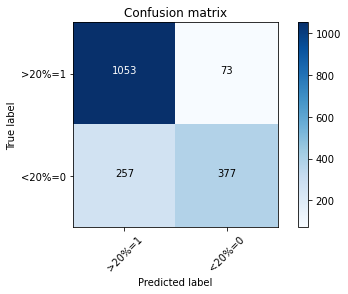

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['>20%=1','<20%=0'],normalize= False,  title='Confusion matrix')

In [25]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.59      0.70       634
         1.0       0.80      0.94      0.86      1126

    accuracy                           0.81      1760
   macro avg       0.82      0.76      0.78      1760
weighted avg       0.82      0.81      0.80      1760



 * Es decir que de las predicciones de este clasificador son correctas el 81% de las veces.

 * La métrica recall informa sobre la cantidad que el clasificador es capaz de identificar correctamente.

### log loss

Esta probabilidad es un valor entre 0 y 1. Log Loss (pérdida logarítmica) mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1

In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)

0.41210301321849535

## 3. Conclusión: políticas para mitigar el riesgo de estos clientes.

 * El modelo informa con una buena exactitud la cantidad de clientes que declaran más ingresos que los que realmente devengan.
 * Para mitigar el riesgo de estos clientes se pueden implementar las siguientes acciones:
   * Solicitar soportes de ingreso a los clientes clasificados.
   * Considerar el nivel de riesgo del solicitante para tomar una decisión favorable.
   * Enfocar estrategias de mercadeo hacia el segmento de **empleados** y **pensionados** teniendo en cuenta su nivel de riesgo y porque en estos dos segmentos se presenta una menor diferencia porcentual entre los ingresos declarados y los realmente devengados.
  * Respecto al segmento de **clientes independientes**:
    * Se debe solicitar extractos bancarios donde se evidencie el flujo de dinero.
    * Se sugiere solicitar documentos legales que soporten la actividad ecónomica.
    * Se sugiere presentar referencias comerciales del cliente/negocio.
    * Se sugiere acompañamiento del gerente comercial del Banco para una mejor verificación de la información. 